In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('..\\data\\checking-logs.sqlite.sqlite_copy')

In [3]:
commits = pd.io.sql.read_sql(
    """
    select date(timestamp) as date, cast(strftime('%H', timestamp) as integer) as hour from checker where uid like 'user_%'
    """,
    conn, parse_dates=['date']
    )
commits

,date,hour
0,2020-04-17,5
1,2020-04-17,5
2,2020-04-17,5
3,2020-04-17,5
4,2020-04-17,5
...,...,...
3202,2020-05-21,20
3203,2020-05-21,20
3204,2020-05-21,20
3205,2020-05-21,20


## Разбиваем данные по будням и выходным

In [4]:
working_day = commits[commits['date'].dt.dayofweek < 5]['hour']
weekend = commits[commits['date'].dt.dayofweek >= 5]['hour']
# weekend.drop('date', axis=1, inplace=True)

In [8]:
len(working_day)

2037

In [9]:
len(weekend)

1170

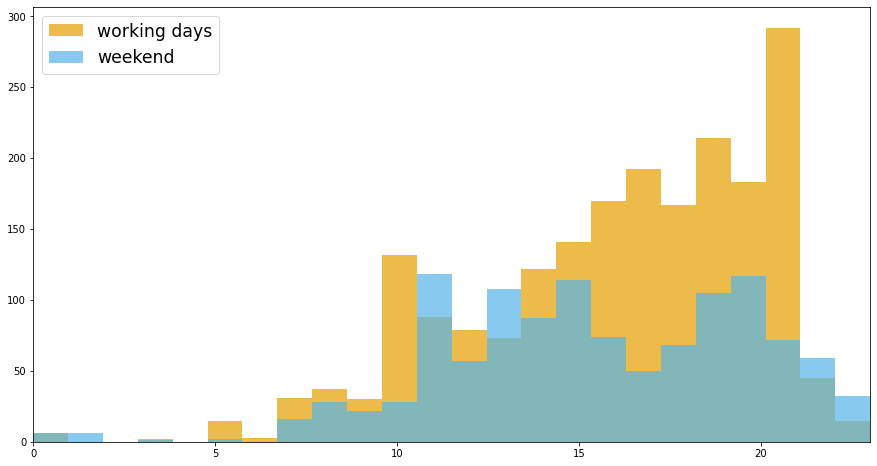

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = ['#E69F00', '#56B4E9']
names = ['working days', 'weekend']
ax.hist([working_day], bins=24, label=names[0], color=colors[0], alpha=0.7)
ax.hist(weekend, bins=24, label=names[1], color=colors[1], alpha=0.7)
ax.legend(loc='upper left', fontsize='xx-large')
ax.set_xlim(0, 23)
plt.show()

## Часы, в которые суммарное количество комментов в выходные больше, чем в будние дни (топ 4):  11, 13, 22, 23

In [10]:
conn.close()